>>>>>>> # Blood Transfusion

>>>>>>> ### Muhammad Nawawi

>>>>>>> ### 09011381722104

Transfusi darah adalah peroses pemimdahan darah dari seseorang (donor) kepada orang lain (resipien).
Transfusi bertujuan mengganti darah yang hilang akibat pendarahan luka bakar, mengatasi shock dan mempertahankan daya tahan tubuh terhadap infeksi.

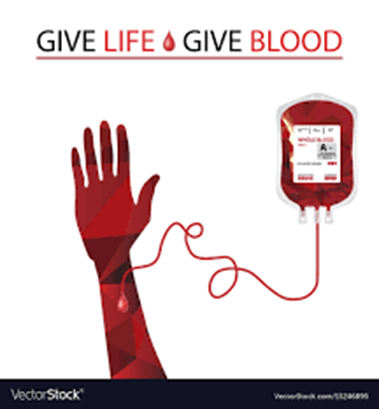

# Dataset

### 1. Informasi Dataset

Untuk menunjukkan model pemasaran RFMTC (versi modifikasi dari RFM), penelitian ini mengadopsi basis data donor dari Pusat Layanan Transfusi Darah di Kota Hsin-Chu di Taiwan. Pusat itu melewati bus layanan transfusi darah mereka ke satu universitas di Kota Hsin-Chu untuk mengumpulkan darah yang disumbangkan sekitar setiap tiga bulan. Untuk membangun model FRMTC, kami memilih 748 donor secara acak dari basis data donor. 748 data donor ini, masing-masing termasuk R (Kekinian - bulan sejak donasi terakhir), F (Frekuensi - jumlah total donasi), M (Moneter - total darah yang disumbangkan dalam cc), T (Waktu - bulan sejak donasi pertama), dan variabel biner yang menunjukkan apakah dia mendonorkan darah pada bulan Maret 2007 (1 singkatan dari mendonorkan darah; 0 berarti tidak mendonorkan darah).

1. Dataset dapat didownload pada -> https://www.kaggle.com/ninalabiba/blood-transfusion-dataset

### 2. Atribut Dataset

Diberikan nama variabel, tipe variabel, unit pengukuran dan deskripsi singkat. "Pusat Layanan Transfusi Darah" adalah masalah klasifikasi. Urutan daftar ini sesuai dengan urutan angka di sepanjang baris database.

R (Kekinian - bulan sejak donasi terakhir),
F (Frekuensi - jumlah total donasi),
M (Moneter - total darah yang disumbangkan dalam c.c.),
T (Waktu - bulan sejak donasi pertama), dan
variabel biner yang menunjukkan apakah dia mendonorkan darah pada bulan Maret 2007 (1 singkatan dari mendonorkan darah; 0 berarti tidak mendonorkan darah).


Kami memilih 500 data secara acak sebagai set pelatihan, dan sisanya 248 sebagai set pengujian.

Statistik deskriptif data

Variabel Tipe Data Pengukuran Deskripsi min max mean std
Input Bulan Kuantitatif, Input 0,03 74,4 9,74 8,07
Input Kali kuantitatif Frekuensi 1 50 5.51 5.84
Kuantitatif moneter c.c. Input darah 250 12500 1378,68 1459,83
Waktu Bulan kuantitatif Input 2.27 98.3 34.42 24.32
Apakah dia mendonorkan darah pada bulan Maret 2007 biner 1 = ya 0 = tidak Keluaran 0 1 1 (24%) 0 (76%)

# Memanggil Library Yang Digunakan

### 1. Preprocessing

Beberapa alat dan metode yang berbeda yang digunakan untuk preprocessing, contohnya seperti : transformasi yang memanipulasi data mentah agar menghasilkan satu input, denoising yang menghilangkan noise dari data, dan lain sebagainya. MinMaxScaler itu memanipulasi sedemikian rupa hingga menjadi data yang memiliki nilai dari ranges 0 sampai 1.

In [1]:
from sklearn.preprocessing import MinMaxScaler

### 2. Categorical

Berfungsi untuk mengkonversikan data binary menjadi data yang dikelompokkan, agar data tersebut dapat diambil bagian-bagiannya sebagai sebuah confusion matrix. Parameter yang digunakan dalam confusion matrix merupakan Categorical serta prediksi hasil training.

In [2]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 3. Model dan Layer

Pada kasus ini, model yang digunakan untuk membuat hidden layer untuk memproses data memiliki fungsi squential.Sedangkan layer sendiri menggunakantipe Danse yang melakukan training dengan menghubungkan setiap Neural Network secara sequential. 

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
numpy.random.seed(5)

Pada baris terakhir diatas merupakan penentuan bobot yang sangat mempengaruhi hasil daro training. Namun untuk data yang masuk ke skala besar, biasanya bobot ditentukan secara random oleh numpy dengan menentukan jumlah seed sesuai dengan banyak data kolom pada dataset.

# Import Dataset

Dataset yang digunakan dalam proses Neural Network ini telah menggunakan format.csv yang merupakan data vekto yang berisi angka-angka sehingga dapat diproses oleh IDE dengan lebih mudah. Pengolahan data yang bertipe string biasanya harus dengan perlakuan tertentu dan tentu saja sedikit lebih rumit,  karena data string tersebut harus ditranslasi dengan menggunakan fungsi yang lebih spesifik.

In [4]:
dataset = numpy.loadtxt("transfusion.data.csv", delimiter= ",")
X = dataset[:,0:4]
Y = dataset[:,4]

Menampilkan dataset

In [5]:
datasett=pd.read_csv("transfusioonn.csv", delimiter=";")
datasett.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donor
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Menampilkan Donor untuk mengetahui banyaknya biner 1 dan 0 yang bernilai 1 = melakukan donor darah pada bulan maret 2007 sedangkan 0 = tidak melakukan donor darah pada bulan maret 2007

In [6]:
datasett.Donor.value_counts()

0    570
1    178
Name: Donor, dtype: int64

1 (24%) 0 (76%)

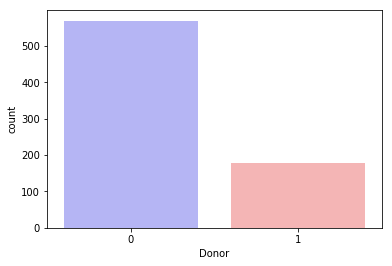

In [7]:
sns.countplot(x="Donor", data=datasett, palette="bwr")
plt.show()

In [8]:
X

array([[2.00e+00, 5.00e+01, 1.25e+04, 9.80e+01],
       [0.00e+00, 1.30e+01, 3.25e+03, 2.80e+01],
       [1.00e+00, 1.60e+01, 4.00e+03, 3.50e+01],
       ...,
       [2.30e+01, 3.00e+00, 7.50e+02, 6.20e+01],
       [3.90e+01, 1.00e+00, 2.50e+02, 3.90e+01],
       [7.20e+01, 1.00e+00, 2.50e+02, 7.20e+01]])

In [9]:
Y

array([1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1.

In [10]:
scaler = MinMaxScaler()
X_scale = scaler.fit(X)
X_scale = scaler.fit_transform(X)

# Categorical

Dalam menganalisis performance dari Neural Network ini, diperlukan confusion matrix yang mengelompokkan data sesuai dengan klasifikasi masing-masing.

In [11]:
Y_categorical = to_categorical(Y)
Y_categorical.shape

(748, 2)

# Mendefinisikan Model

### 1. Pembangian Data Train dan Data Testing

In [12]:
train_X, test_X, train_Y, test_Y =train_test_split(X_scale,Y, test_size=0.10)

### 2. Tipe Model 

Mendefinisikan model sequwntial() yang ditampung kedalam variabel model.

In [13]:
model = Sequential()

### 3. Input Layer

Fungsi yang digunakan adalah Relu(Rectified Linear Unit), dimana cara kerjanya yaitu dengan mengubah setiap nilai input negatif menjadi 0 pada grafik sesegera mungkin.

In [14]:
model.add(Dense(25, input_dim=4, activation='relu'))
model.add(Dense(500, activation='relu'))

### 4. Output Layer

Fungsi softmax sering digunakan pada lapisan akhir dari pengklasifikasian jaringan berbasis saraf. Jaringan seperti ini umumnya ditrain dibawah log loss (atau crossentropy), yang memberikan varian nilai non-linear regresi logistik multinominal.

In [15]:
# menambahkan layer output kedalam model dengan activation softmax
model.add(Dense(2, activation='softmax'))

# Compile Model 

Setelah melakukan proses definisi model, selanjutnya adalah mengcompile model tersebut sehingga menjadi satu kesatuan hidden yang biasa disebut dengan hidden layer. Contoh gambar hidden layer :

Ketika menggunakan objective function categorical_crossentropy, target harus dalam format kategoris (misalnya jika memiliki 10 kelas, target untuk setiap sampel harus berupa vector 10-dimensi yang semuanya nol kecuali untuk 1 pada indeks yang sama dengan kelas sampel).

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit Model

Untuk mendapatkan hasil akurasi dan loss dari dataset, langkah selanjutnya yang harus dilakukan adalah fit model. Dimana pada proses ini terjadi proses training dengan parameter:

1. X yang telah diprocessing
2. Y yang telah dikonversi menjadi categorical
3. Banyaknya Epochs atau proses training
4. Batch_size

Disini Epochs atau training yang saya lakukan sebanyak 200 kali.

In [17]:
proses = model.fit(train_X,train_Y, validation_data=(test_X,test_Y), epochs=400, batch_size=10)


Train on 673 samples, validate on 75 samples
Epoch 1/400
673/673 [==============================] - 3s 4ms/step - loss: 0.5619 - accuracy: 0.7667 - val_loss: 0.5386 - val_accuracy: 0.7333
Epoch 2/400
673/673 [==============================] - 0s 685us/step - loss: 0.5160 - accuracy: 0.7667 - val_loss: 0.4729 - val_accuracy: 0.7600
Epoch 3/400
673/673 [==============================] - 1s 811us/step - loss: 0.4925 - accuracy: 0.7682 - val_loss: 0.4422 - val_accuracy: 0.7867
Epoch 4/400
673/673 [==============================] - 1s 765us/step - loss: 0.4832 - accuracy: 0.7682 - val_loss: 0.4361 - val_accuracy: 0.7867
Epoch 5/400
673/673 [==============================] - 0s 726us/step - loss: 0.4827 - accuracy: 0.7712 - val_loss: 0.4154 - val_accuracy: 0.8000
Epoch 6/400
673/673 [==============================] - 1s 750us/step - loss: 0.4786 - accuracy: 0.7771 - val_loss: 0.4089 - val_accuracy: 0.8000
Epoch 7/400
673/673 [==============================] - 1s 926us/step - loss: 0.4791 - 

Epoch 111/400
673/673 [==============================] - 0s 716us/step - loss: 0.4548 - accuracy: 0.7964 - val_loss: 0.4117 - val_accuracy: 0.8667
Epoch 112/400
673/673 [==============================] - 0s 645us/step - loss: 0.4572 - accuracy: 0.8009 - val_loss: 0.4070 - val_accuracy: 0.8533
Epoch 113/400
673/673 [==============================] - 0s 631us/step - loss: 0.4535 - accuracy: 0.7964 - val_loss: 0.3999 - val_accuracy: 0.8533
Epoch 114/400
673/673 [==============================] - 1s 768us/step - loss: 0.4608 - accuracy: 0.7890 - val_loss: 0.4061 - val_accuracy: 0.8533
Epoch 115/400
673/673 [==============================] - 0s 648us/step - loss: 0.4550 - accuracy: 0.7964 - val_loss: 0.4075 - val_accuracy: 0.8667
Epoch 116/400
673/673 [==============================] - 0s 605us/step - loss: 0.4627 - accuracy: 0.7964 - val_loss: 0.4050 - val_accuracy: 0.8533
Epoch 117/400
673/673 [==============================] - 0s 719us/step - loss: 0.4527 - accuracy: 0.8083 - val_loss: 0

Epoch 167/400
673/673 [==============================] - 1s 830us/step - loss: 0.4486 - accuracy: 0.7979 - val_loss: 0.3978 - val_accuracy: 0.8533
Epoch 168/400
673/673 [==============================] - 0s 707us/step - loss: 0.4517 - accuracy: 0.7964 - val_loss: 0.4274 - val_accuracy: 0.8400
Epoch 169/400
673/673 [==============================] - 0s 597us/step - loss: 0.4511 - accuracy: 0.7994 - val_loss: 0.4282 - val_accuracy: 0.8400
Epoch 170/400
673/673 [==============================] - 0s 668us/step - loss: 0.4504 - accuracy: 0.8009 - val_loss: 0.4256 - val_accuracy: 0.8267
Epoch 171/400
673/673 [==============================] - 0s 639us/step - loss: 0.4523 - accuracy: 0.7920 - val_loss: 0.4335 - val_accuracy: 0.8133
Epoch 172/400
673/673 [==============================] - 0s 619us/step - loss: 0.4506 - accuracy: 0.8009 - val_loss: 0.4160 - val_accuracy: 0.8533
Epoch 173/400
673/673 [==============================] - 0s 642us/step - loss: 0.4491 - accuracy: 0.7949 - val_loss: 0

Epoch 278/400
673/673 [==============================] - 1s 855us/step - loss: 0.4391 - accuracy: 0.8009 - val_loss: 0.4092 - val_accuracy: 0.8400
Epoch 279/400
673/673 [==============================] - 0s 655us/step - loss: 0.4397 - accuracy: 0.7979 - val_loss: 0.4087 - val_accuracy: 0.8400
Epoch 280/400
673/673 [==============================] - 0s 741us/step - loss: 0.4392 - accuracy: 0.7979 - val_loss: 0.4046 - val_accuracy: 0.8400
Epoch 281/400
673/673 [==============================] - 0s 723us/step - loss: 0.4403 - accuracy: 0.7994 - val_loss: 0.4161 - val_accuracy: 0.8400
Epoch 282/400
673/673 [==============================] - 0s 637us/step - loss: 0.4347 - accuracy: 0.7949 - val_loss: 0.4205 - val_accuracy: 0.8400
Epoch 283/400
673/673 [==============================] - 0s 689us/step - loss: 0.4392 - accuracy: 0.8068 - val_loss: 0.4199 - val_accuracy: 0.8400
Epoch 284/400
673/673 [==============================] - 0s 659us/step - loss: 0.4391 - accuracy: 0.8009 - val_loss: 0

Epoch 334/400
673/673 [==============================] - 1s 2ms/step - loss: 0.4308 - accuracy: 0.7964 - val_loss: 0.4097 - val_accuracy: 0.8400
Epoch 335/400
673/673 [==============================] - 1s 1ms/step - loss: 0.4352 - accuracy: 0.7994 - val_loss: 0.4471 - val_accuracy: 0.8000
Epoch 336/400
673/673 [==============================] - 1s 1ms/step - loss: 0.4353 - accuracy: 0.8024 - val_loss: 0.4362 - val_accuracy: 0.8267
Epoch 337/400
673/673 [==============================] - 1s 1ms/step - loss: 0.4322 - accuracy: 0.7949 - val_loss: 0.4091 - val_accuracy: 0.8533
Epoch 338/400
673/673 [==============================] - 1s 984us/step - loss: 0.4308 - accuracy: 0.8053 - val_loss: 0.4480 - val_accuracy: 0.8133
Epoch 339/400
673/673 [==============================] - 1s 2ms/step - loss: 0.4309 - accuracy: 0.8009 - val_loss: 0.4344 - val_accuracy: 0.8133
Epoch 340/400
673/673 [==============================] - 1s 1ms/step - loss: 0.4305 - accuracy: 0.8009 - val_loss: 0.4241 - val_

# Prediksi Model

Prediksi model diambil dari nilai pada data X yang diprocessing, dimana nantinya nilai prediksi tersebut digunakan sebagai parameter confusion matrix.

In [18]:
predict = model.predict(test_X)
predict

array([[0.7822292 , 0.21777079],
       [0.92399514, 0.07600486],
       [0.3312999 , 0.66870004],
       [0.6158855 , 0.38411453],
       [0.7717081 , 0.22829194],
       [0.5637423 , 0.43625775],
       [0.42932808, 0.5706719 ],
       [0.57494867, 0.42505136],
       [0.99591655, 0.0040835 ],
       [0.87263745, 0.12736256],
       [0.8325588 , 0.16744114],
       [0.8354548 , 0.16454513],
       [0.5949728 , 0.40502727],
       [0.7808429 , 0.21915703],
       [0.6970798 , 0.3029202 ],
       [0.68355596, 0.31644413],
       [0.6876421 , 0.31235793],
       [0.9453771 , 0.05462294],
       [0.92399514, 0.07600486],
       [0.5722791 , 0.42772084],
       [0.8267136 , 0.17328633],
       [0.78485185, 0.21514815],
       [0.8251619 , 0.1748381 ],
       [0.4226467 , 0.57735324],
       [0.58187866, 0.41812143],
       [0.7395619 , 0.26043805],
       [0.8650222 , 0.13497785],
       [0.77601427, 0.22398575],
       [0.9442304 , 0.05576965],
       [0.61402917, 0.38597083],
       [0.

# Evaluasi Model

Secara umum, performa dari proses model Neural Network untuk dataset diabetic retinopathy yang dibuat tadu sudah dapat dilihat dengan menampilkan akurasinya. Hanya saja, untuk peforma lain seperti Precisision, Spesificity, dan Sensitivity belum dapat diketahui, karena membutuhkan fungsi yang berbeda, yaitu confusion matrix.

In [19]:
scores = model.evaluate(test_X, test_Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

75/75 [==============================] - 0s 625us/step

accuracy: 84.00%


# Performance

Setelah mendapatkan hasil singkay dari proses training pada model diatas, selanjutnya dapat dilakukan analisis performance dengan membuat confusion matrix dari Y yang telah diubah menjadi categorical dan nilai prediksi dari model Neural Network terhadap X yang telah diprocessing.

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_Y,predict.argmax(axis=1))

In [21]:
print(cm)

[[54  1]
 [11  9]]


Type Markdown and LaTeX

# 1. Konversi Array Confusion Matrix Kedalam Variabel Bertipe Float

Kerena data yang didapat dari confusion matrix masih dalam bentuk array, untuk dapat mengkalkulasi nilai tersebut haruslah mengkorversinya kebentuk tipe data integer ataupun float, saya menggunakan variabel yang bertipe data float. Disamping kapasitasnya yang lebih besar dibanding integer, tipe data float juga dapat menampilkan nilai berkoma yang nantinya akan membuat persentase dari akurasi, sensitivty, specivicity dan presisi lebih akurat.

In [22]:
# True Positif
TP= cm[[0],[0]]
TP = float(TP)

# False Positif
FP = cm[[0],[1]]
FP = float(FP)

#False Negatif
FN = cm[[1],[0]]
FN = float(FN)

# True Negatif
TN = cm[[1],[1]]
TN = float(TN)

# 2. Accuracy

Akurasi dalam masalah klarifikasi adalah jumlah prediksi yang tepat yang dibuat oleh model atas semua jenis prediksi yang dibuat.

In [23]:
print('Accuracy:', ((TP+TN)/(TP+TN+FP+FN)) * 100, '%')

Accuracy: 84.0 %


# 3. Precision

Presisi adalah ukuran yang memberi tahu berapa proporsi pasien yang didiagnosa menderita kanker yang sebenarnya memang menderita kanker. Yang diprediksi mengidap kanker (TP dan FP) dan orang-orang yang benar-benar mengidap kanker (TP).

In [24]:
print('Precision:', (TP/(TP+FP) * 100), '%')

Precision: 98.18181818181819 %


# 4. Sensitivity

Sensitivity adalah ukuran yang memberitahu berapa proporsi pasien yang benar-benar menderita kanker didiagnosis oleh algoritmik sebagai kanker. Yang sebenarnya mengidap kanker (TP dan FN) dan orang-orang yang didiagnosis oleh model yang mengidap kanker(TP). (Catatan:FN dimasukkan karena orang itu benar-benar mengidap kanker meskipun modelnya memperkirakan sebaliknya).

In [25]:
print('Sensitivity:', (TP/(TP+FN) * 100), '%')

Sensitivity: 83.07692307692308 %


# 5. Specificity 

Spesifitas adalah ukuran yang memberitahu beberapa proposi pasien yang TIDAK menderita kanker, diprediksi oleh model sebagai non-kanker. Yang sebenarnya tidak mengidap kanker(FP dan TN) dan orang-orang yang didiagnosis oleh model tidak menderita kanker adalah TN. (Catatan: FP disertakan karena orang itu TIDAK benar-benar menderita kanker meskipun modelnya memperkirakan sebaliknya).

![](2.PNG)

In [26]:
print('Specificity:', (TN/(TN+FP) * 100), '%')

Specificity: 90.0 %


# Visualisasi Proses Training

Dari proses training diatas, setiap loss pada epochs yang terjadi ketika training dapat ditampilkan dalam bentuk grafik. Setiap komponen pada grafik pun dapat ditentukan sesuai keperluan masing-masing.

## 1. Model Akurasi

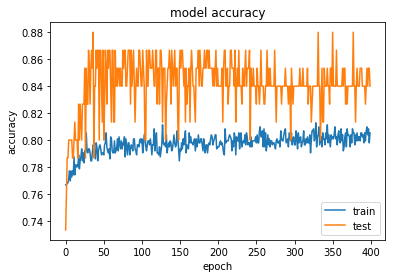

In [27]:
plt.plot(proses.history['accuracy'])
plt.plot(proses.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## 2. Model Loss

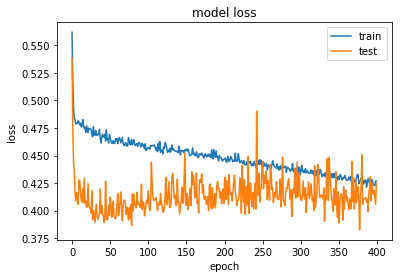

In [28]:
plt.plot(proses.history['loss'])
plt.plot(proses.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Kesimpulan